In [1]:
import pandas as pd
import scanpy as sc 
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import os,re


In [2]:
os.chdir("/home/maolp/data5/Gaofeng_All_matrix/Allcount/")

In [3]:
os.getcwd()

'/data5/maolp/Gaofeng_All_matrix/Allcount'

In [4]:


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', 'No data for colormapping provided via', UserWarning)


In [5]:
adata1=sc.read_h5ad("./All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad")

In [6]:
adata1

AnnData object with n_obs × n_vars = 245834 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [7]:
adata1.uns['log1p']["base"] = None

In [8]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 300

In [9]:
cols01 = ["#f49128", "#194a55", "#187c65", "#f26115", "#c29f62", "#83ba9e"]
cols02 = ["#c62d17", "#023f75", "#ea894e", "#266b69", "#eb4601", "#f6c619"]
cols03 = ["#fa6e01", "#2f2f2f", "#972b1d", "#e6a84b", "#4c211b", "#ff717f"]
cols04 = ["#223e9c", "#b12b23", "#aebea6", "#edae11", "#0f6657", "#c74732"]
cols05 = ["#6a73cf", "#edd064", "#0eb0c8", "#f2ccac", "#a1d5b9", "#e1abbc"]

all_colors = cols01 + cols02 + cols03 + cols04 + cols05

colorname2 = [
    "#46A040", "#00AF99", "#FFC179", "#98D9E9", "#F6313E", "#FFA300", "#333366",
    "#FF5A00", "#663366", "#FF6666", "#8F1336", "#0081C9", "#001588", "#CC0033",
    "#CC9966", "#CC0033", "#999933", "#009966", "#CCCC33", "#CCFF99", "#333399",
    "#993333", "#490C65", "#BA7FD0", "#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A",
    "#006D2C", "#868686", "#B5AD64", "#9DA8E2", "#91C392", "#FF9900", "#339966"
] + all_colors

colorname3 = colorname2

print(colorname3)
print(len(colorname3))


['#46A040', '#00AF99', '#FFC179', '#98D9E9', '#F6313E', '#FFA300', '#333366', '#FF5A00', '#663366', '#FF6666', '#8F1336', '#0081C9', '#001588', '#CC0033', '#CC9966', '#CC0033', '#999933', '#009966', '#CCCC33', '#CCFF99', '#333399', '#993333', '#490C65', '#BA7FD0', '#A6CEE3', '#1F78B4', '#DE77AE', '#B2DF8A', '#006D2C', '#868686', '#B5AD64', '#9DA8E2', '#91C392', '#FF9900', '#339966', '#f49128', '#194a55', '#187c65', '#f26115', '#c29f62', '#83ba9e', '#c62d17', '#023f75', '#ea894e', '#266b69', '#eb4601', '#f6c619', '#fa6e01', '#2f2f2f', '#972b1d', '#e6a84b', '#4c211b', '#ff717f', '#223e9c', '#b12b23', '#aebea6', '#edae11', '#0f6657', '#c74732', '#6a73cf', '#edd064', '#0eb0c8', '#f2ccac', '#a1d5b9', '#e1abbc']
65


In [10]:
adata1.obs['Last_cell_type'].value_counts()

Naïve CD4 T             38253
Classical Monocytes     30436
Late_ERY                28078
CXCR5+ Naïve B          26800
Naïve CD8 T             14659
CX3CR1+ NK              13394
Mid_ERY                  9211
abT(entry)               8456
CXCR5- Naïve B           8381
DP(P) T                  8119
CXCR6+ NK                7395
DN(Q) T                  5410
Early_ERY                4665
Treg                     4546
DP(Q) T                  4025
Megakaryocytes           4020
DC2                      3379
HSC_MPP                  3248
Macrophages              2727
MEMP                     2527
Th17like_INNATE_T        2074
Gamma Delta V2 T         1873
NK T                     1649
Myeloid-CD177            1538
CD56highCD16low NK       1315
Endothelial cells        1142
MEP                      1134
Large pre-B              1099
GNG4 +CD8aa+T            1088
pDC                       884
Pro-B                     850
CD14+PPBP+ Monocytes      780
ILC2/3                    663
Others    

In [11]:
len(adata1.obs['Cell_lineage'].unique())

8

In [12]:
len(adata1.obs['Last_cell_type'].unique())

39

In [13]:
cell_types_list = [
    "HSC_MPP",
    
    "MEP",
    "MEMP",
    "Pro-B",
    "Large pre-B",
    "Small pre-B",
    
    "CXCR5- Naïve B",
    "CXCR5+ Naïve B",

      "DN(Q) T",
    "DP(P) T",
 
    "DP(Q) T",
    
    "Treg",
    
    "Cycling Treg",
  
    "Naïve CD4 T",
    "Naïve CD8 T",
    "abT(entry)",
    
    
    'Tem',
        "Th17like_INNATE_T",
        'NK T',
        "Gamma Delta V1 T",
    "Gamma Delta V2 T",
    



    "GNG4 +CD8aa+T",

     "ILC2/3",


    "CX3CR1+ NK",
    
    "CXCR6+ NK",
    "CD56highCD16low NK",

    
    "Myeloid-CD177",
    "Classical Monocytes",
    "CD14+PPBP+ Monocytes",
    'Macrophages',
    "DC1",
    "DC2",
    "pDC",

    "Megakaryocytes",

    
    "Early_ERY",
    "Mid_ERY",
    "Late_ERY",

    "Endothelial cells",
     "Others"


]


In [14]:
unique_last_cell_types = adata1.obs["Last_cell_type"].unique()
difference = set(unique_last_cell_types) - set(cell_types_list)
print("差集:", difference)
difference =  set(cell_types_list)-set(unique_last_cell_types) 
print("差集:", difference)


差集: set()
差集: set()


In [15]:
# 给每个元素添加数字
cell_types_list_numbered = ["{}_{}".format(i + 1, cell_type) for i, cell_type in enumerate(cell_types_list)]

# 输出结果
for cell_type in cell_types_list_numbered:
    print(cell_type)

1_HSC_MPP
2_MEP
3_MEMP
4_Pro-B
5_Large pre-B
6_Small pre-B
7_CXCR5- Naïve B
8_CXCR5+ Naïve B
9_DN(Q) T
10_DP(P) T
11_DP(Q) T
12_Treg
13_Cycling Treg
14_Naïve CD4 T
15_Naïve CD8 T
16_abT(entry)
17_Tem
18_Th17like_INNATE_T
19_NK T
20_Gamma Delta V1 T
21_Gamma Delta V2 T
22_GNG4 +CD8aa+T
23_ILC2/3
24_CX3CR1+ NK
25_CXCR6+ NK
26_CD56highCD16low NK
27_Myeloid-CD177
28_Classical Monocytes
29_CD14+PPBP+ Monocytes
30_Macrophages
31_DC1
32_DC2
33_pDC
34_Megakaryocytes
35_Early_ERY
36_Mid_ERY
37_Late_ERY
38_Endothelial cells
39_Others


In [16]:
cell_types_dict = dict(zip(cell_types_list, cell_types_list_numbered))

# 输出结果
for key, value in cell_types_dict.items():
    print("{}: {}".format(key, value))
cell_type_mapping=cell_types_dict

HSC_MPP: 1_HSC_MPP
MEP: 2_MEP
MEMP: 3_MEMP
Pro-B: 4_Pro-B
Large pre-B: 5_Large pre-B
Small pre-B: 6_Small pre-B
CXCR5- Naïve B: 7_CXCR5- Naïve B
CXCR5+ Naïve B: 8_CXCR5+ Naïve B
DN(Q) T: 9_DN(Q) T
DP(P) T: 10_DP(P) T
DP(Q) T: 11_DP(Q) T
Treg: 12_Treg
Cycling Treg: 13_Cycling Treg
Naïve CD4 T: 14_Naïve CD4 T
Naïve CD8 T: 15_Naïve CD8 T
abT(entry): 16_abT(entry)
Tem: 17_Tem
Th17like_INNATE_T: 18_Th17like_INNATE_T
NK T: 19_NK T
Gamma Delta V1 T: 20_Gamma Delta V1 T
Gamma Delta V2 T: 21_Gamma Delta V2 T
GNG4 +CD8aa+T: 22_GNG4 +CD8aa+T
ILC2/3: 23_ILC2/3
CX3CR1+ NK: 24_CX3CR1+ NK
CXCR6+ NK: 25_CXCR6+ NK
CD56highCD16low NK: 26_CD56highCD16low NK
Myeloid-CD177: 27_Myeloid-CD177
Classical Monocytes: 28_Classical Monocytes
CD14+PPBP+ Monocytes: 29_CD14+PPBP+ Monocytes
Macrophages: 30_Macrophages
DC1: 31_DC1
DC2: 32_DC2
pDC: 33_pDC
Megakaryocytes: 34_Megakaryocytes
Early_ERY: 35_Early_ERY
Mid_ERY: 36_Mid_ERY
Late_ERY: 37_Late_ERY
Endothelial cells: 38_Endothelial cells
Others: 39_Others


In [17]:
cell_type_mapping

{'HSC_MPP': '1_HSC_MPP',
 'MEP': '2_MEP',
 'MEMP': '3_MEMP',
 'Pro-B': '4_Pro-B',
 'Large pre-B': '5_Large pre-B',
 'Small pre-B': '6_Small pre-B',
 'CXCR5- Naïve B': '7_CXCR5- Naïve B',
 'CXCR5+ Naïve B': '8_CXCR5+ Naïve B',
 'DN(Q) T': '9_DN(Q) T',
 'DP(P) T': '10_DP(P) T',
 'DP(Q) T': '11_DP(Q) T',
 'Treg': '12_Treg',
 'Cycling Treg': '13_Cycling Treg',
 'Naïve CD4 T': '14_Naïve CD4 T',
 'Naïve CD8 T': '15_Naïve CD8 T',
 'abT(entry)': '16_abT(entry)',
 'Tem': '17_Tem',
 'Th17like_INNATE_T': '18_Th17like_INNATE_T',
 'NK T': '19_NK T',
 'Gamma Delta V1 T': '20_Gamma Delta V1 T',
 'Gamma Delta V2 T': '21_Gamma Delta V2 T',
 'GNG4 +CD8aa+T': '22_GNG4 +CD8aa+T',
 'ILC2/3': '23_ILC2/3',
 'CX3CR1+ NK': '24_CX3CR1+ NK',
 'CXCR6+ NK': '25_CXCR6+ NK',
 'CD56highCD16low NK': '26_CD56highCD16low NK',
 'Myeloid-CD177': '27_Myeloid-CD177',
 'Classical Monocytes': '28_Classical Monocytes',
 'CD14+PPBP+ Monocytes': '29_CD14+PPBP+ Monocytes',
 'Macrophages': '30_Macrophages',
 'DC1': '31_DC1',
 'DC2

In [18]:
adata1.obs['Last_cell_type']

Cellname
Z48_AAACCTGAGATAGGAG-1        CXCR5- Naïve B
Z48_AAACCTGAGGCACATG-1              Late_ERY
Z48_AAACCTGAGGTGCAAC-1               Mid_ERY
Z48_AAACCTGCAAGAGTCG-1              Late_ERY
Z48_AAACCTGCACACCGAC-1              Late_ERY
                                 ...        
Z123_TTTGTCATCGCAAGCC-1             Late_ERY
Z123_TTTGTCATCTAACTCT-1             Late_ERY
Z123_TTTGTCATCTACTTAC-1    Th17like_INNATE_T
Z123_TTTGTCATCTCCCTGA-1       CXCR5- Naïve B
Z123_TTTGTCATCTGGTGTA-1             Late_ERY
Name: Last_cell_type, Length: 245834, dtype: category
Categories (39, object): ['CD14+PPBP+ Monocytes', 'CD56highCD16low NK', 'CX3CR1+ NK', 'CXCR5+ Naïve B', ..., 'Th17like_INNATE_T', 'Treg', 'abT(entry)', 'pDC']

In [19]:
adata1.obs['Last_cell_type'].replace(cell_type_mapping)

Cellname
Z48_AAACCTGAGATAGGAG-1         7_CXCR5- Naïve B
Z48_AAACCTGAGGCACATG-1              37_Late_ERY
Z48_AAACCTGAGGTGCAAC-1               36_Mid_ERY
Z48_AAACCTGCAAGAGTCG-1              37_Late_ERY
Z48_AAACCTGCACACCGAC-1              37_Late_ERY
                                   ...         
Z123_TTTGTCATCGCAAGCC-1             37_Late_ERY
Z123_TTTGTCATCTAACTCT-1             37_Late_ERY
Z123_TTTGTCATCTACTTAC-1    18_Th17like_INNATE_T
Z123_TTTGTCATCTCCCTGA-1        7_CXCR5- Naïve B
Z123_TTTGTCATCTGGTGTA-1             37_Late_ERY
Name: Last_cell_type, Length: 245834, dtype: category
Categories (39, object): ['29_CD14+PPBP+ Monocytes', '26_CD56highCD16low NK', '24_CX3CR1+ NK', '8_CXCR5+ Naïve B', ..., '18_Th17like_INNATE_T', '12_Treg', '16_abT(entry)', '33_pDC']

In [20]:
adata1.obs['Last_cell_type_num'] = adata1.obs['Last_cell_type'].replace(cell_type_mapping)

In [21]:
# adata1.obs['Last_cell_type_num2'] 

In [22]:
adata1.obs['Last_cell_type_num'] 

Cellname
Z48_AAACCTGAGATAGGAG-1         7_CXCR5- Naïve B
Z48_AAACCTGAGGCACATG-1              37_Late_ERY
Z48_AAACCTGAGGTGCAAC-1               36_Mid_ERY
Z48_AAACCTGCAAGAGTCG-1              37_Late_ERY
Z48_AAACCTGCACACCGAC-1              37_Late_ERY
                                   ...         
Z123_TTTGTCATCGCAAGCC-1             37_Late_ERY
Z123_TTTGTCATCTAACTCT-1             37_Late_ERY
Z123_TTTGTCATCTACTTAC-1    18_Th17like_INNATE_T
Z123_TTTGTCATCTCCCTGA-1        7_CXCR5- Naïve B
Z123_TTTGTCATCTGGTGTA-1             37_Late_ERY
Name: Last_cell_type_num, Length: 245834, dtype: category
Categories (39, object): ['29_CD14+PPBP+ Monocytes', '26_CD56highCD16low NK', '24_CX3CR1+ NK', '8_CXCR5+ Naïve B', ..., '18_Th17like_INNATE_T', '12_Treg', '16_abT(entry)', '33_pDC']

In [23]:
adata1.obs['Last_cell_type_num2'] = adata1.obs['Last_cell_type_num'].str.extract('(\d+)')
adata1.obs['Last_cell_type_num2'].unique()

array(['7', '37', '36', '12', '8', '18', '14', '2', '34', '15', '21',
       '35', '26', '24', '19', '23', '32', '28', '3', '1', '33', '27',
       '17', '4', '16', '39', '25', '29', '22', '5', '20', '38', '31',
       '9', '11', '13', '10', '30', '6'], dtype=object)

In [24]:
adata1.obs['Last_cell_type_num'].value_counts()

14_Naïve CD4 T             38253
28_Classical Monocytes     30436
37_Late_ERY                28078
8_CXCR5+ Naïve B           26800
15_Naïve CD8 T             14659
24_CX3CR1+ NK              13394
36_Mid_ERY                  9211
16_abT(entry)               8456
7_CXCR5- Naïve B            8381
10_DP(P) T                  8119
25_CXCR6+ NK                7395
9_DN(Q) T                   5410
35_Early_ERY                4665
12_Treg                     4546
11_DP(Q) T                  4025
34_Megakaryocytes           4020
32_DC2                      3379
1_HSC_MPP                   3248
30_Macrophages              2727
3_MEMP                      2527
18_Th17like_INNATE_T        2074
21_Gamma Delta V2 T         1873
19_NK T                     1649
27_Myeloid-CD177            1538
26_CD56highCD16low NK       1315
38_Endothelial cells        1142
2_MEP                       1134
5_Large pre-B               1099
22_GNG4 +CD8aa+T            1088
33_pDC                       884
4_Pro-B   

In [25]:
# import re

# Cellienage_Dict_no_prefix = {re.sub("^\d+_", "", key): value for key, value in Cellienage_Dict.items()}


In [26]:
# Cellienage_Dict_no_prefix

In [27]:
adata1

AnnData object with n_obs × n_vars = 245834 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [28]:
adata1.obs['Last_cell_type_num2'].value_counts()

14    38253
28    30436
37    28078
8     26800
15    14659
24    13394
36     9211
16     8456
7      8381
10     8119
25     7395
9      5410
35     4665
12     4546
11     4025
34     4020
32     3379
1      3248
30     2727
3      2527
18     2074
21     1873
19     1649
27     1538
26     1315
38     1142
2      1134
5      1099
22     1088
33      884
4       850
29      780
23      663
39      566
31      452
17      448
20      328
6       160
13       62
Name: Last_cell_type_num2, dtype: int64

In [29]:
adata1.obs['Last_cell_type_num'].value_counts()

14_Naïve CD4 T             38253
28_Classical Monocytes     30436
37_Late_ERY                28078
8_CXCR5+ Naïve B           26800
15_Naïve CD8 T             14659
24_CX3CR1+ NK              13394
36_Mid_ERY                  9211
16_abT(entry)               8456
7_CXCR5- Naïve B            8381
10_DP(P) T                  8119
25_CXCR6+ NK                7395
9_DN(Q) T                   5410
35_Early_ERY                4665
12_Treg                     4546
11_DP(Q) T                  4025
34_Megakaryocytes           4020
32_DC2                      3379
1_HSC_MPP                   3248
30_Macrophages              2727
3_MEMP                      2527
18_Th17like_INNATE_T        2074
21_Gamma Delta V2 T         1873
19_NK T                     1649
27_Myeloid-CD177            1538
26_CD56highCD16low NK       1315
38_Endothelial cells        1142
2_MEP                       1134
5_Large pre-B               1099
22_GNG4 +CD8aa+T            1088
33_pDC                       884
4_Pro-B   

In [30]:
def create_palette(cell_types, colors):
    cell_type_colors = {}
    for i, cell_type in enumerate(cell_types):
        color = colors[i % len(colors)]
        cell_type_colors[cell_type] = color
    return cell_type_colors

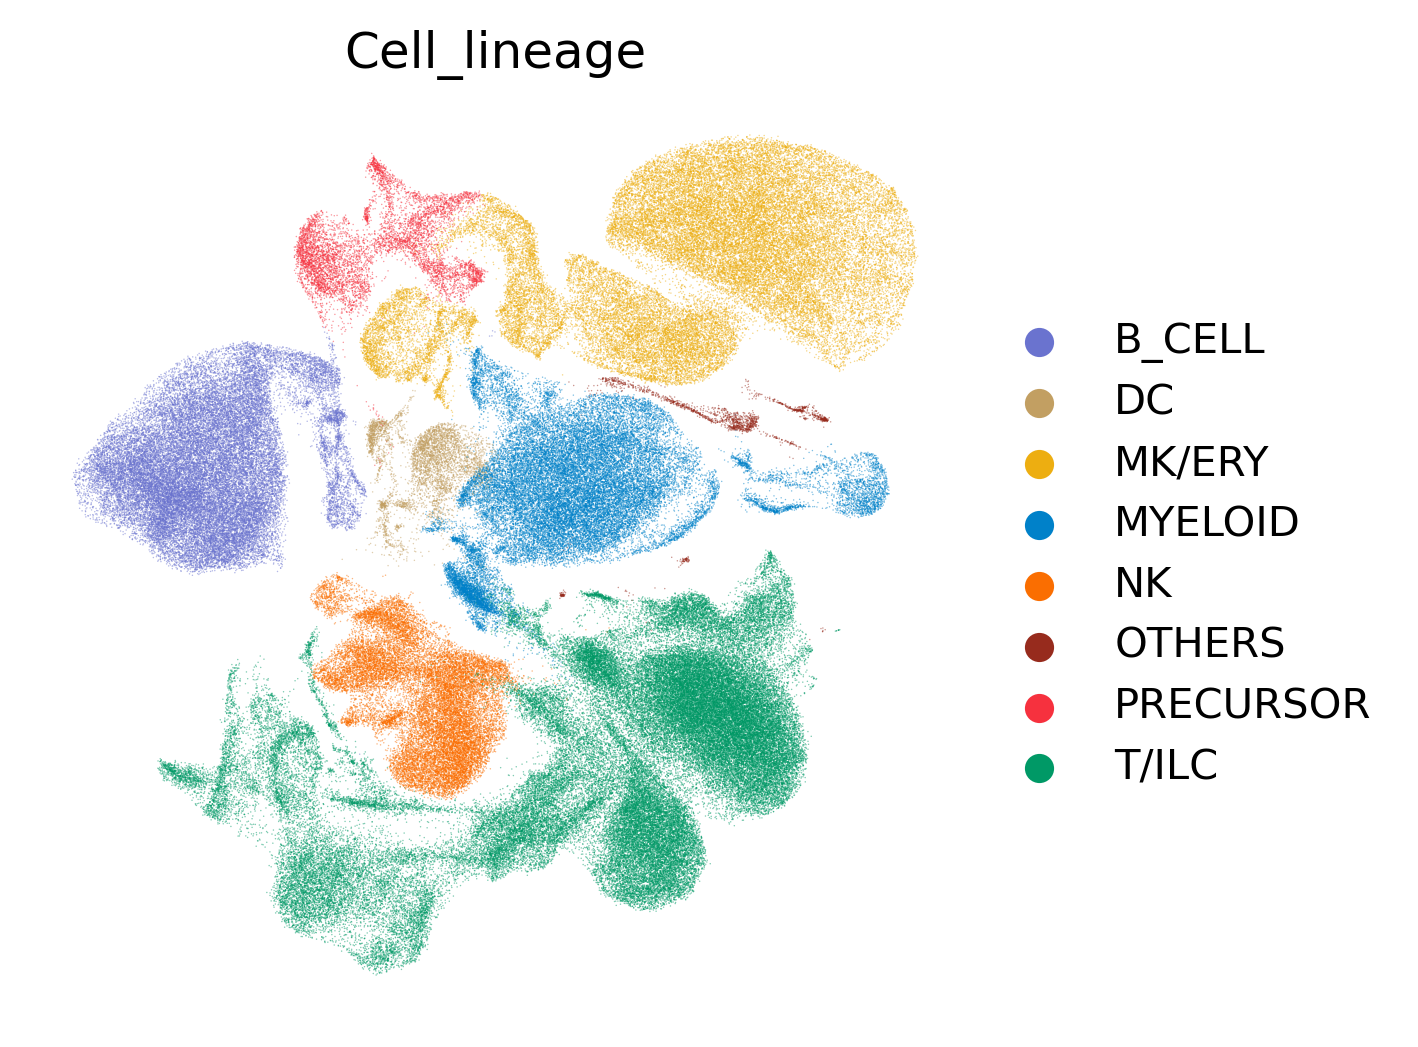

In [31]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 300
sc.pl.umap(adata1, color = [ "Cell_lineage"],palette=create_palette(adata1.obs["Cell_lineage"].unique(),[
"#6a73cf","#edae11","#009966","#F6313E", "#fa6e01", "#c29f62","#0081C9","#972b1d"]), alpha=0.5,legend_fontweight="normal",frameon=False)


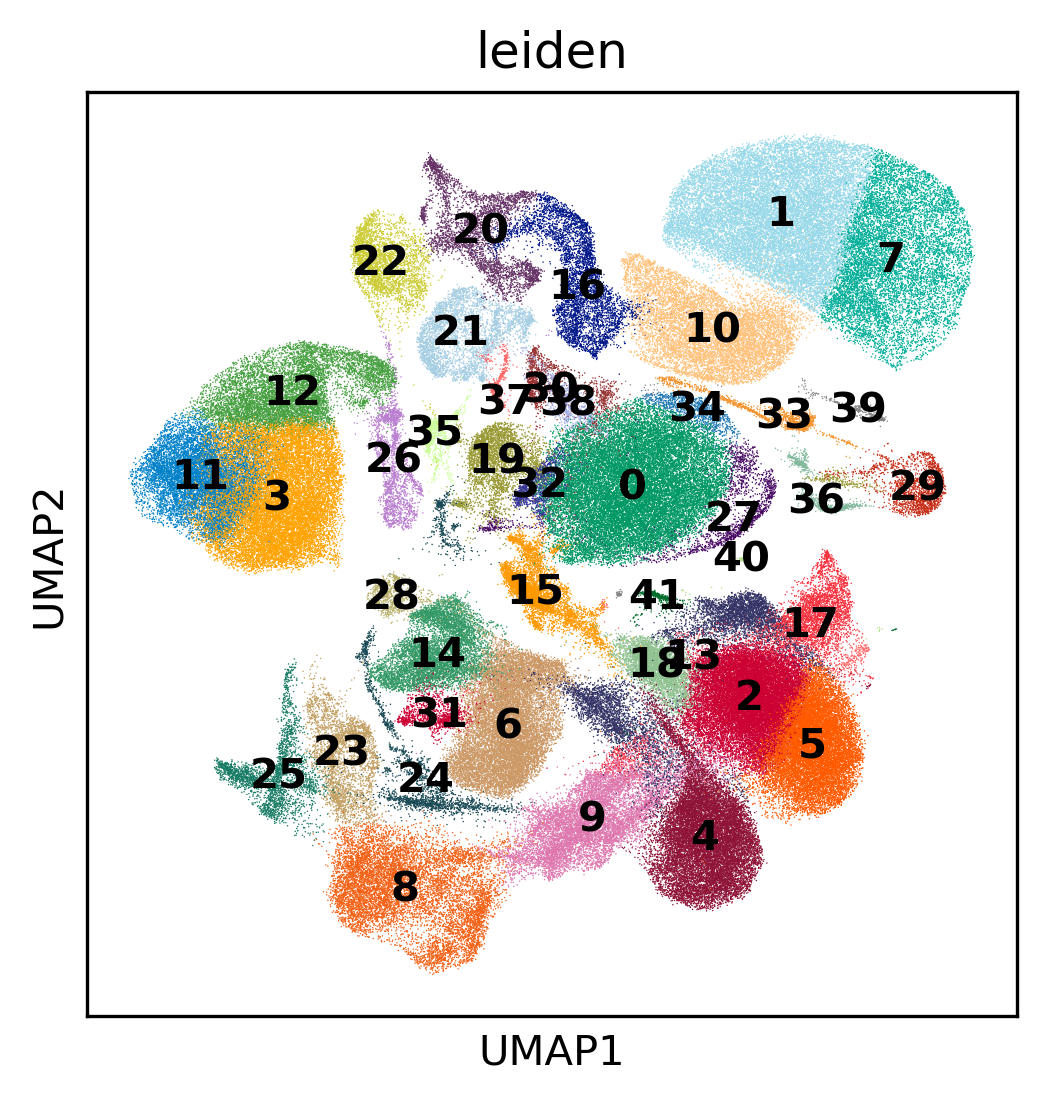

In [32]:
sc.pl.umap(adata1 ,color=['leiden'],palette=create_palette(adata1.obs["leiden"].unique(),colorname2),legend_loc='on data')

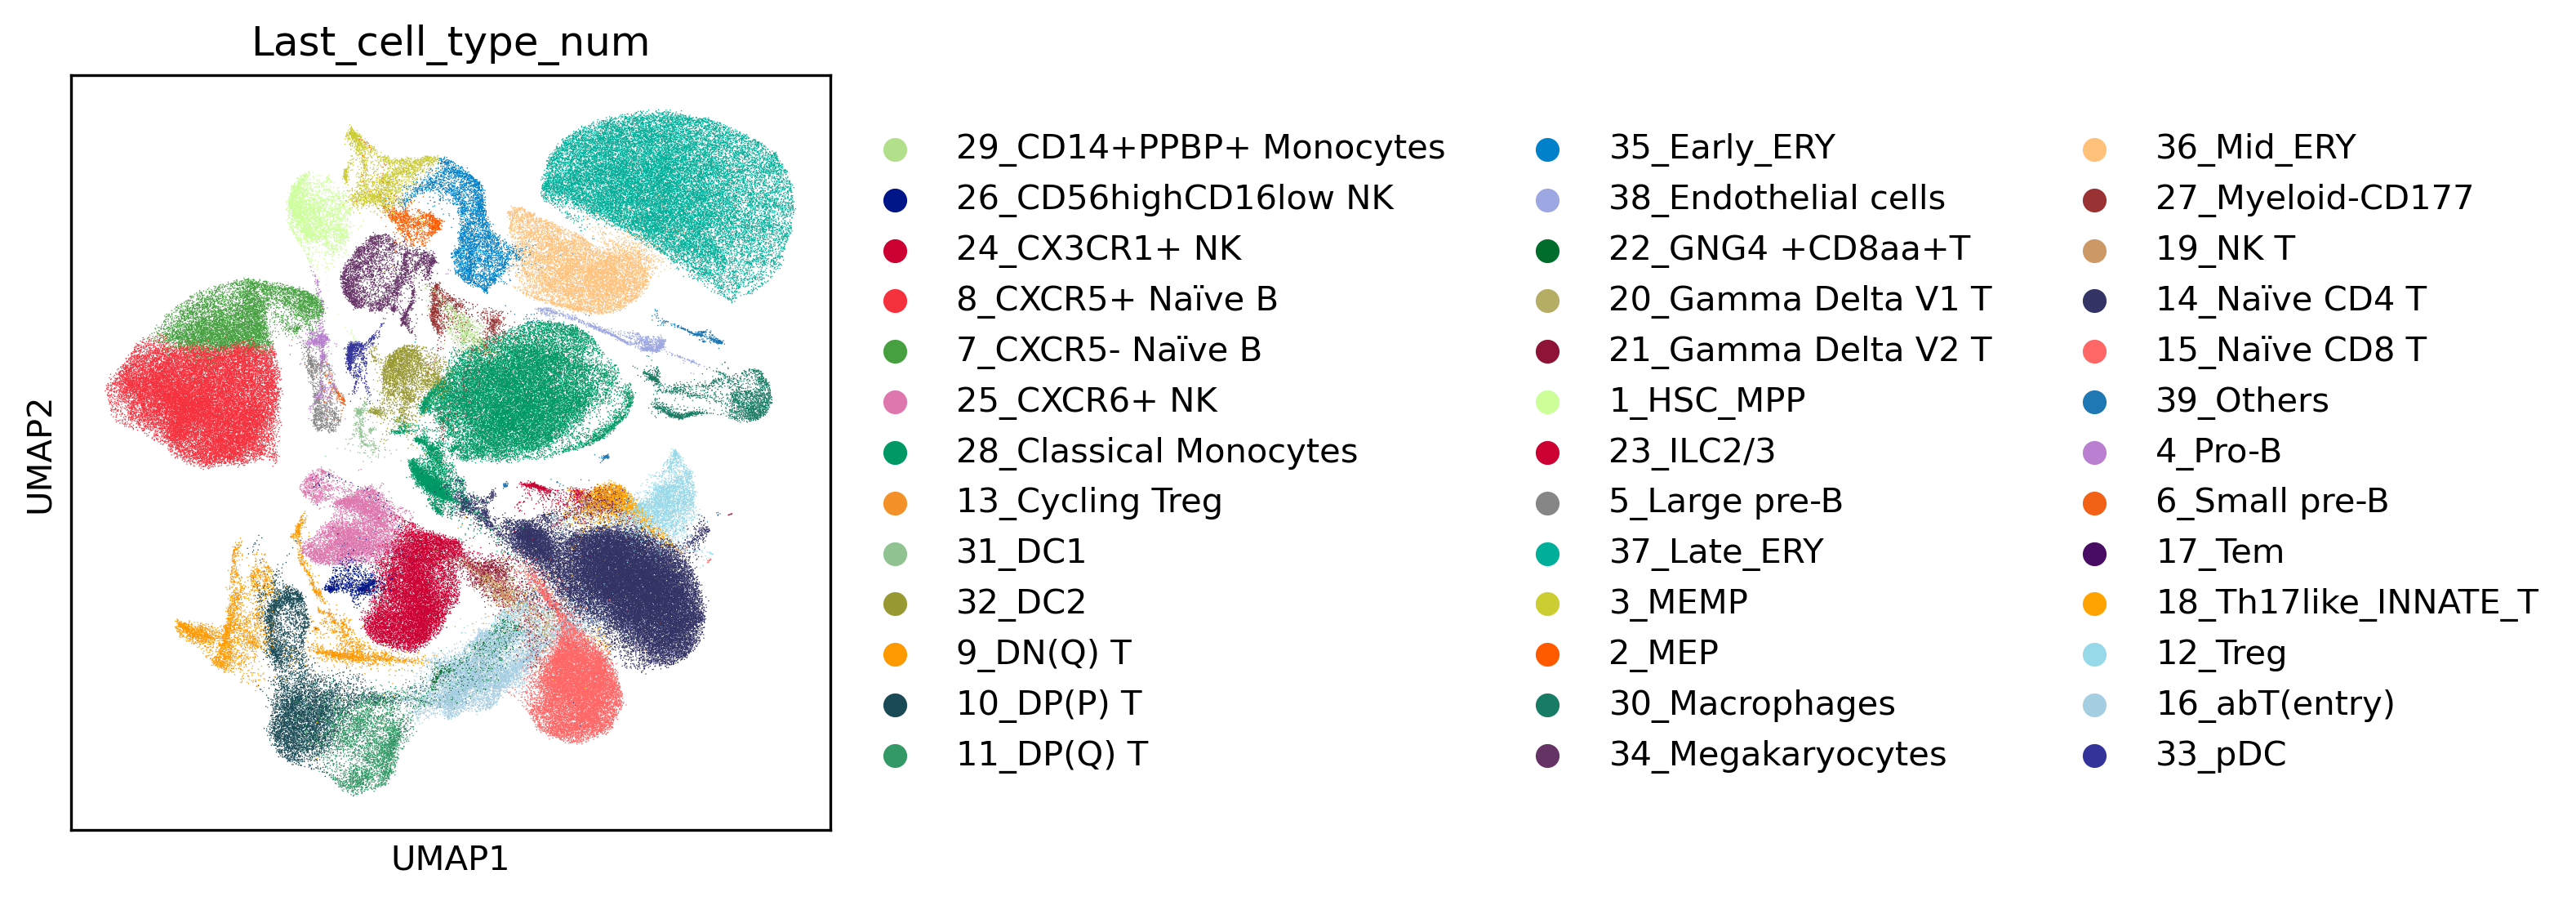

In [33]:
sc.pl.umap(adata1 ,color=['Last_cell_type_num'],palette=create_palette(adata1.obs["Last_cell_type_num"].unique(),colorname2))

In [34]:
adata1.write("./All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad")